## I. Data Preparation Questions
### 1) What specific data transforms did you perform prior to exploration and analysis, and why did you choose these?

I started by transforming categorical variables into one-hot-encoded format

I then used a simple imputer with a 'most_frequent' strategy as it works with categorical data. Since I have strings representing categorical data in this data set if I tried to use 'mean' as a strategy I would get an error preventing me from using the imputer on my data.

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from data_util import *
import numpy as np 
df_train = pd.read_csv('../data/AmesHousingSetA.csv')

# Transform categorical variables into one-hot-encoded format
df_train = pd.get_dummies(df_train, columns=cat_features(df_train))

data_x = df_train[list(df_train)[1:]]
data_y = df_train[list(df_train)[0]]

In [90]:
data_x.head()

,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,...,Sale.Type_ConLw,Sale.Type_New,Sale.Type_Oth,Sale.Type_WD,Sale.Condition_Abnorml,Sale.Condition_AdjLand,Sale.Condition_Alloca,Sale.Condition_Family,Sale.Condition_Normal,Sale.Condition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [91]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data_x) 
data_x = imputer.transform(data_x)

## II. Exploratory Analysis Questions
### Perform an exploratory analysis on your data by visualizing and/or applying other means of data exploration.

### 1) What (if any) insights jump out at you?
Generally the more space a house has, the more it will be worth. The same goes for number of rooms/kitchens of course since you can't have more rooms without more space.

### 2) Do you have any hypotheses about relationship of certain variables to the price?
The larger the area the more expensive, the newer the building the more expensive, the higher the quality values the more expensive etc. It should line up with common sense when purchasing a home: the more desirable the more it will be worth.


In [92]:
# Get general info about sales prices in this data set
df_train['SalePrice'].describe()

count      2344.000000
mean     180512.479522
std       81071.834942
min       12789.000000
25%      129350.000000
50%      160000.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

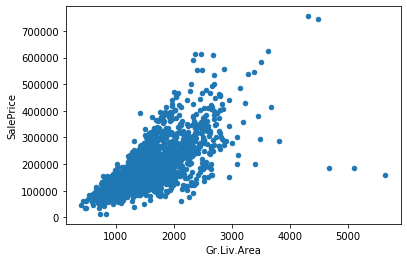

In [93]:
# Check correlation with the above ground living area
elem = 'Gr.Liv.Area'
info = pd.concat([df_train['SalePrice'], df_train[elem]], axis=1)
info.plot.scatter(x=elem, y='SalePrice');

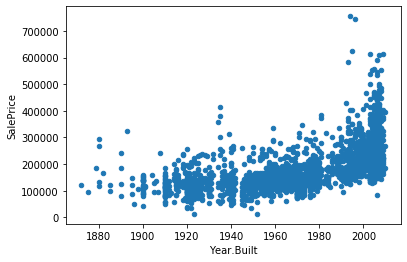

In [94]:
# Check correlation with the year built
# It seems that generally the newer the house the more expensive it is except in the cases in which extremely old houses are considered historical or special due to their age.
elem = 'Year.Built'
info = pd.concat([df_train['SalePrice'], df_train[elem]], axis=1)
info.plot.scatter(x=elem, y='SalePrice');

## III. Model Building
### First construct a baseline model (containing all predictors) to predict the price. Then build the best model you can devise. In this part use ONLY dataset A and DO NOT TOUCH dataset B. You will want to split this into training and test sets and apply error metrics/compare models only on the test data.

### 1) What approach did you use to arrive at the best model? Why did you select this approach?

### 2) Which error metric(s) are you using to compare performance? What is the value(s) of the error metric(s) for the baseline model and your best model?

In [95]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=4)

In [96]:
base_mod = linear_model.LinearRegression()
base_mod.fit(x_train, y_train)
preds = base_mod.predict(x_test)
print_regression_error_report(preds, y_test)

MSE, MAE, R^2, EVS: [4397315503188949.5, 20148825.991405487, 0.8682360569828977, 0.8687800434313953]


## IV. Predicting and Validating
### Run your baseline and best models on dataset B. DO NOT do any further training. Remember to apply all transforms you used in building the model to this set (use the transform function on the preprocessors you created in part I).

### 1) What are the respective error metric values for each model on this set? How did your best model do on this data as compared to the baseline?

### 2) Is your best model a good model? Why or why not